In [142]:
# import neccsasry libraries 

import pandas as pd
from census import Census
from us import states
from ast import literal_eval
import matplotlib.pyplot as plt

In [143]:
# Loading Boston Globe dataset 
bostonGlobe_data = pd.read_csv('Boston_Globe_2010_5000_articles_approx.csv')

In [144]:
#List of columns 
bostonGlobe_data.columns

Index(['Unnamed: 0', 'hl1_x', 'body', 'llama_prediction', 'Explicit_Pass_1',
       'NER_Pass_1', 'NER_Pass_1_Sorted', 'NER_Pass_1_Coordinates',
       'NER_prediction', 'NER_Sorted', 'NER_Sorted_Coordinates', 'Tracts',
       'position_section', 'position_subsection', 'hl1_y', 'hl2', 'author',
       'lede', 'pub_date', 'indexing_terms', 'year', 'actual_body_word_count',
       'body_cleaned'],
      dtype='object')

In [145]:
# To examine full dataset without truncation 
pd.set_option('display.max_rows', None)  # None means display all rows
pd.set_option('display.max_columns', None)  # None means display all columns

In [146]:
# Function to extract and clean coordinates
def extract_coordinates(coord):
    if pd.isna(coord):
        return None, None
    lat, lon = coord.strip(' []').split(',')
    return float(lat), float(lon)

In [147]:
# Applying the function to extract latitude and longitude
bostonGlobe_data[['latitude', 'longitude']] = bostonGlobe_data['NER_Sorted_Coordinates'].apply(lambda x: pd.Series(extract_coordinates(x)))

In [148]:
# Droping rows where coordinates could not be extracted
bostonGlobe_data.dropna(subset=['latitude', 'longitude'], inplace=True)

In [149]:
# Function to clean the tract values
def clean_tract(tract):
    return tract.strip("[]' ")

# Applying the function to the 'Tracts' column
bostonGlobe_data['Tracts'] = bostonGlobe_data['Tracts'].apply(clean_tract)

# Printing the DataFrame to verify
print(bostonGlobe_data[['Tracts']].head())

   Tracts
0  000806
2  030302
3  030302
6  365100
7  000402


In [150]:
#loading census tract data 
census_tract_data = pd.read_csv('census-tract-data.csv')

In [151]:
# Extracting the columns about demogrpahic (12-20) from the census-tract-data 
race_columns = census_tract_data.iloc[:, 12:20]

In [55]:
# Standardizing the tract codes in the census-tract-data to 6 digits to match the tract codes in the Boston Globe dataset. 
census_tract_data['TRACT'] = census_tract_data['TRACT'].astype(str).str.zfill(6)


In [152]:
# Merging the two datasets based on the standardized tract codes
merged_data = bostonGlobe_data.merge(census_tract_data[['TRACT'] + list(race_columns.columns)], left_on='Tracts', right_on='TRACT', how='inner')

In [161]:
# Displaying first five rows of dataframe to inspect 
merged_data.head()

,Unnamed: 0,hl1_x,body,llama_prediction,Explicit_Pass_1,NER_Pass_1,NER_Pass_1_Sorted,NER_Pass_1_Coordinates,NER_prediction,NER_Sorted,NER_Sorted_Coordinates,Tracts,position_section,position_subsection,hl1_y,hl2,author,lede,pub_date,indexing_terms,year,actual_body_word_count,body_cleaned,latitude,longitude,TRACT,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races
0,35,foreclosure suits rising against banks,bank executives are swarming capitol hill this...,Based on the information provided in the art...,NaN,"[(this week, 'DATE'), (one, 'CARDINAL'), (50, ...","[(bank of america corp, 'ORG'), (maine ally fi...",NaN,"[(1, 'CARDINAL'), (Boston, 'GPE'), (2, 'CARDIN...","[('Fenway', 'FAC'), ('Bank of America Corp.', ...","[-71.0923139, 42.346832]",981800,BUSINESS,unknown,foreclosure suits rising against banks,unknown,Associated Press,new york - foreclosure fraud class-action laws...,2010-11-18,"{'subject': [{'score': '92', 'classCode': 'STX...",2010,142,bank executives swarming capitol hill week def...,-71.092314,42.346832,981800,15,2,2,0,0,0,0,4
1,999,before the quake,because events can always be canceled or sold ...,Based on the information provided in the art...,NaN,"[(two weeks, 'DATE')]",[],NaN,"[(1, 'CARDINAL'), (Boston, 'GPE'), (Fenway, 'L...","[('Fenway', 'FAC'), ('Globe', 'ORG'), ('Fenway...","[-71.0923139, 42.346832]",981800,G,Living Arts,before the quake,unknown,unknown,"between 1964 and 1975, dr. arthur m. morrissey...",2010-02-22,"{'subject': [{'score': '73', 'classCode': 'STX...",2010,32,"events always canceled sold , ' best call conf...",-71.092314,42.346832,981800,15,2,2,0,0,0,0,4
2,1000,before the quake,because events can always be canceled or sold ...,Based on the information provided in the art...,NaN,"[(two weeks, 'DATE')]",[],NaN,"[(1, 'CARDINAL'), (Boston, 'GPE'), (Fenway, 'L...","[('Fenway', 'FAC'), ('Globe', 'ORG'), ('Fenway...","[-71.0923139, 42.346832]",981800,G,Living Arts,day at the museum,unknown,unknown,if you're lucky enough to have today off and s...,2010-01-18,"{'subject': [{'score': '92', 'classCode': 'N71...",2010,32,"events always canceled sold , ' best call conf...",-71.092314,42.346832,981800,15,2,2,0,0,0,0,4
3,1001,before the quake,because events can always be canceled or sold ...,Based on the information provided in the art...,NaN,"[(two weeks, 'DATE')]",[],NaN,"[(1, 'CARDINAL'), (Boston, 'GPE'), (Fenway, 'L...","[('Fenway', 'FAC'), ('Globe', 'ORG'), ('Fenway...","[-71.0923139, 42.346832]",981800,G,Living Arts,guiding lights,unknown,unknown,"every day in boston, countless people make the...",2010-01-04,"{'subject': [{'score': '88', 'classCode': 'ST0...",2010,32,"events always canceled sold , ' best call conf...",-71.092314,42.346832,981800,15,2,2,0,0,0,0,4
4,1002,before the quake,because events can always be canceled or sold ...,Based on the information provided in the art...,NaN,"[(two weeks, 'DATE')]",[],NaN,"[(1, 'CARDINAL'), (Boston, 'GPE'), (Fenway, 'L...","[('Fenway', 'FAC'), ('Globe', 'ORG'), ('Fenway...","[-71.0923139, 42.346832]",981800,G,Living Arts,it takes village,unknown,unknown,lin-manuel miranda's first memory is of new yo...,2010-01-12,"{'subject': [{'score': '77', 'classCode': 'ST0...",2010,32,"events always canceled sold , ' best call conf...",-71.092314,42.346832,981800,15,2,2,0,0,0,0,4


In [163]:
# Renaming columns in the dataframe for better readability and understanding.
merged_data.rename(columns={"P0020005": "White alone", 
                            "P0020006": "Black or African American alone", 
                            "P0020002": "Hispanic or Latino", 
                            "P0020008": "Asian alone", 
                            "P0020007": "American Indian and Alaska Native alone", 
                            "P0020009": "Native Hawaiian and Other Pacific Islander alone", 
                            "P0020010": "Some Other Race alone", 
                            "P0020011": "Population of two or more races"}, inplace=True)

In [164]:
# List of unique tract codes in the dataset. 
merged_data.TRACT.unique()

array(['981800', '980101', '120105', '981501', '981100', '100500',
       '130200', '120301', '110301', '981700', '981300', '101001',
       '120201', '140202', '101002', '110601', '981202', '110106',
       '980300', '120500', '130402', '110104', '110403', '100800',
       '101102', '120400', '110502', '100200', '990101', '110105',
       '100603', '981000', '140300', '100400', '140102', '980900',
       '120700', '110401', '110607', '981201', '130404', '120103',
       '100900', '110501'], dtype=object)

In [165]:
# new dataframe with article title, tract number and demogrpahic
df = merged_data[['hl1_x','TRACT', 'White alone',
                  'Black or African American alone',
                  'Hispanic or Latino', 
                  'Asian alone', 
                  'American Indian and Alaska Native alone', 
                  'Native Hawaiian and Other Pacific Islander alone', 
                  'Some Other Race alone', 
                  'Population of two or more races']].copy()

In [167]:
# Displaying first five rows of dataframe to inspect 
df.head()

,hl1_x,TRACT,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races
0,foreclosure suits rising against banks,981800,15,2,2,0,0,0,0,4
1,before the quake,981800,15,2,2,0,0,0,0,4
2,before the quake,981800,15,2,2,0,0,0,0,4
3,before the quake,981800,15,2,2,0,0,0,0,4
4,before the quake,981800,15,2,2,0,0,0,0,4


In [171]:
# Counting occurrences of each tract and maping these counts to a new 'Article_Count' column.
tract_counts = df['TRACT'].value_counts()
df['Article_Count'] = df['TRACT'].map(tract_counts)

In [172]:
# Displaying first five rows of dataframe to inspect 
df.head()

,hl1_x,TRACT,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races,Article_Count
0,foreclosure suits rising against banks,981800,15,2,2,0,0,0,0,4,13
1,before the quake,981800,15,2,2,0,0,0,0,4,13
2,before the quake,981800,15,2,2,0,0,0,0,4,13
3,before the quake,981800,15,2,2,0,0,0,0,4,13
4,before the quake,981800,15,2,2,0,0,0,0,4,13


In [175]:
# Dataframe with tract code and article count
count_df = df[['TRACT', 'Article_Count']].copy()
count_df.drop_duplicates(inplace=True)
count_df.head()  

,TRACT,Article_Count
0,981800,13
13,980101,8
21,120105,6
27,981501,5
32,981100,1


In [179]:
# Dataframe with tract number and demographic stats for each tract 
tract_race_df = df[['TRACT', 'White alone',
                  'Black or African American alone',
                  'Hispanic or Latino', 
                  'Asian alone', 
                  'American Indian and Alaska Native alone', 
                  'Native Hawaiian and Other Pacific Islander alone', 
                  'Some Other Race alone', 
                  'Population of two or more races']].copy()

In [180]:
# removing duplicates 
tract_race_df.drop_duplicates(inplace=True)
tract_race_df.head()


,TRACT,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races
0,981800,15,2,2,0,0,0,0,4
13,980101,0,0,0,0,0,0,0,0
21,120105,1896,120,173,148,5,3,12,135
27,981501,5,0,6,1,0,0,0,1
32,981100,27,19,44,0,0,2,1,4


In [181]:

max_race_df = pd.DataFrame(tract_race_df)

# Converting all columns to numeric
max_race_df.set_index("TRACT", inplace=True)
new_df_numeric = max_race_df.apply(pd.to_numeric, errors='coerce')

# Identifying the highest race for each tract and adding a new column
max_race_df["majority_race"] = new_df_numeric.idxmax(axis=1)

# Displaying the updated dataframe
max_race_df.reset_index(inplace=True)
max_race_df.head()

,TRACT,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races,majority_race
0,981800,15,2,2,0,0,0,0,4,White alone
1,980101,0,0,0,0,0,0,0,0,White alone
2,120105,1896,120,173,148,5,3,12,135,White alone
3,981501,5,0,6,1,0,0,0,1,Hispanic or Latino
4,981100,27,19,44,0,0,2,1,4,Hispanic or Latino


In [183]:
# Dataframe with number of articles and majority race for each tract 
final_df = pd.merge(count_df, max_race_df[['TRACT', 'majority_race']], on='TRACT')

# Displaying the updated DataFrame
final_df

,TRACT,Article_Count,majority_race
0,981800,13,White alone
1,980101,8,White alone
2,120105,6,White alone
3,981501,5,Hispanic or Latino
4,981100,1,Hispanic or Latino
5,100500,7,Black or African American alone
6,130200,3,White alone
7,120301,8,White alone
8,110301,1,White alone
9,981700,24,Population of two or more races


In [188]:
# Grouping the data by 'majority_race' and summing up the 'Article_Count'
article_counts_by_race = final_df.groupby('majority_race')['Article_Count'].sum()

# Converting the result to a dataframe 
article_counts_df = article_counts_by_race.reset_index()

# Renaming columns for better readability
article_counts_df.columns = ['Majority Race', 'Article Count']

# Printing the result
print("Number of articles per race:")
print(article_counts_df.to_string(index=False))

Number of articles per race:
                  Majority Race  Article Count
Black or African American alone             24
             Hispanic or Latino             15
Population of two or more races             24
                    White alone            100


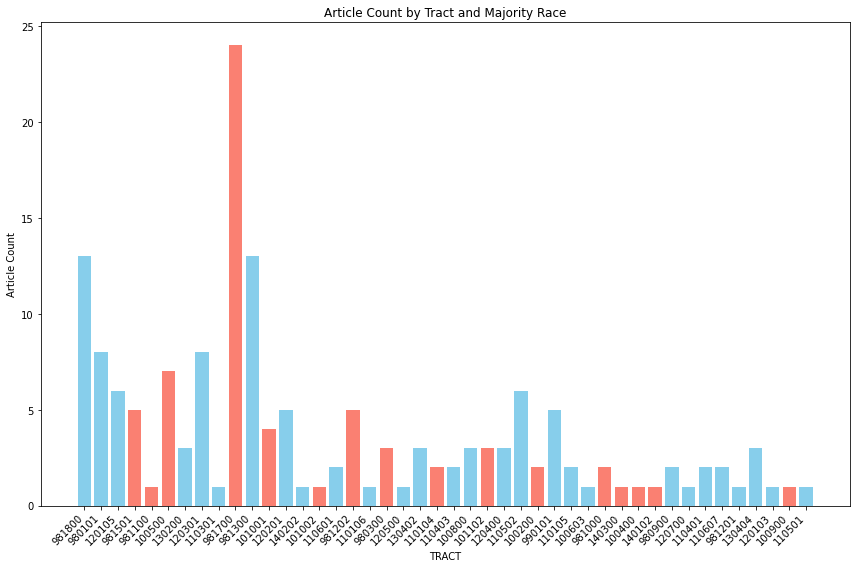

In [184]:
#Visualization (in progress)
final_df = pd.DataFrame(final_df)

# Creating a plot for the data
plt.figure(figsize=(12, 8))
colors = ['skyblue' if race == "White alone" else 'salmon' for race in final_df['majority_race']]
plt.bar(final_df['TRACT'], final_df['Article_Count'], color=colors)
plt.title('Article Count by Tract and Majority Race')
plt.xlabel('TRACT')
plt.ylabel('Article Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()